# Lab Assignment 2

In the third assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning () repository on Github.

### Deadline October 26th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [210]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn has the dataset built in. The dataset contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the following cell shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


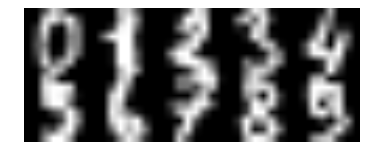

In [211]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. Also pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner.

Plot how your score on the test set improves over time. My best score was about 85% correct!

Make sure to comment your code.

In [212]:
#Make a prediction function h
def prediction_function(x,theta):
    return 1 / (1 + exp(-(theta.T.dot(x))))

In [213]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):  
    m = x_predict.shape[0]
    return (1./m) * (-(y).T.dot(log(x_predict)) - (1-y).T.dot(log(1-x_predict)))

In [214]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    return outer((x_predict-y).T,x) / len(x_predict)

C:\Users\Floortje\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


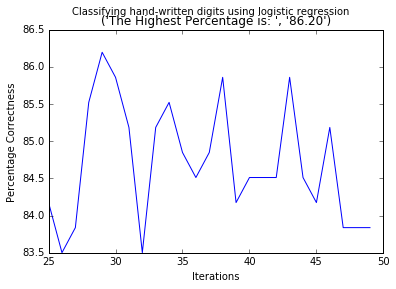

In [215]:
# -----Initialization----- #
alpha = 0.1
iterations = 25
theta = np.zeros((64,10))

x = np.reshape(digits.images[:1500],(1500,64)) 
x_test = np.reshape(digits.images[1500:],(297,64)) 

m = x.shape[0]
l = x_test.shape[0]

target = digits.target[:1500]
target_test = digits.target[1500:]

# ----Learning function---- #
def training_function(x, target, theta, iterations): # The training function repeated i [iterations] times, and within
    for i in range(iterations):                      # this iteration the value for theta is updated for every training set. 
        for j in range(m):
            x_predict = prediction_function(x[j,:],theta)
            y = np.zeros(10)                                          
            y[target[j]] = 1                                               
            theta = theta - dot(alpha, compute_gradient(x_predict,y,x[j,:]).T) #Calculate theta using the compute_gradient function
    return theta

# ----Testing function---- #
def test_function(x, target, theta):
    score = 0                                          #To begin we start with zero correct tests and increment counter 
    for i in range(x.shape[0]):                        #accordingly 
        x_pred = prediction_function(x[i,:],theta)
        if x_pred.argmax() == target[i]:               #The test function iterates over the x values and checks if the max 
            score += 1                                 #predicted value is equal to the target value, if so it increments
    return score                                       #the score counter that keeps track of the number of correct tests

# ---Plotting the Results-- #
p = np.zeros(shape=(iterations,1))  #store the percentage value for all iterations
for i in range(iterations):
    theta = training_function(x, target, theta, iterations)        #Applying gradient descent using the learning function
    score = test_function(x_test, target_test, theta)              #Calculating the number of correct tests 
    p[i] = float(score) / l *100                                   #Calculating the percentage of correct tests

x = np.reshape(np.arange(iterations,2*iterations), (iterations,1)) #Vector with all the numbers of iterations
q = p.argmax()                                                     #Index of Max value for the percentage value

plot(x,p)
xlabel("Iterations")
ylabel("Percentage Correctness")
suptitle("Classifying hand-written digits using logistic regression")
title(("The Highest Percentage is: ", ("%.2f" % p[q]))) 
